In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:/Users/shena/Downloads/cc_data.csv')


In [11]:
print("Shape of dataset:", df.shape)


Shape of dataset: (389002, 23)


In [13]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


trans_date_trans_time: 293627 unique values
merchant: 693 unique values
category: 14 unique values
first: 352 unique values
last: 481 unique values
gender: 2 unique values
street: 979 unique values
city: 890 unique values
state: 51 unique values
job: 492 unique values
dob: 964 unique values
trans_num: 389002 unique values


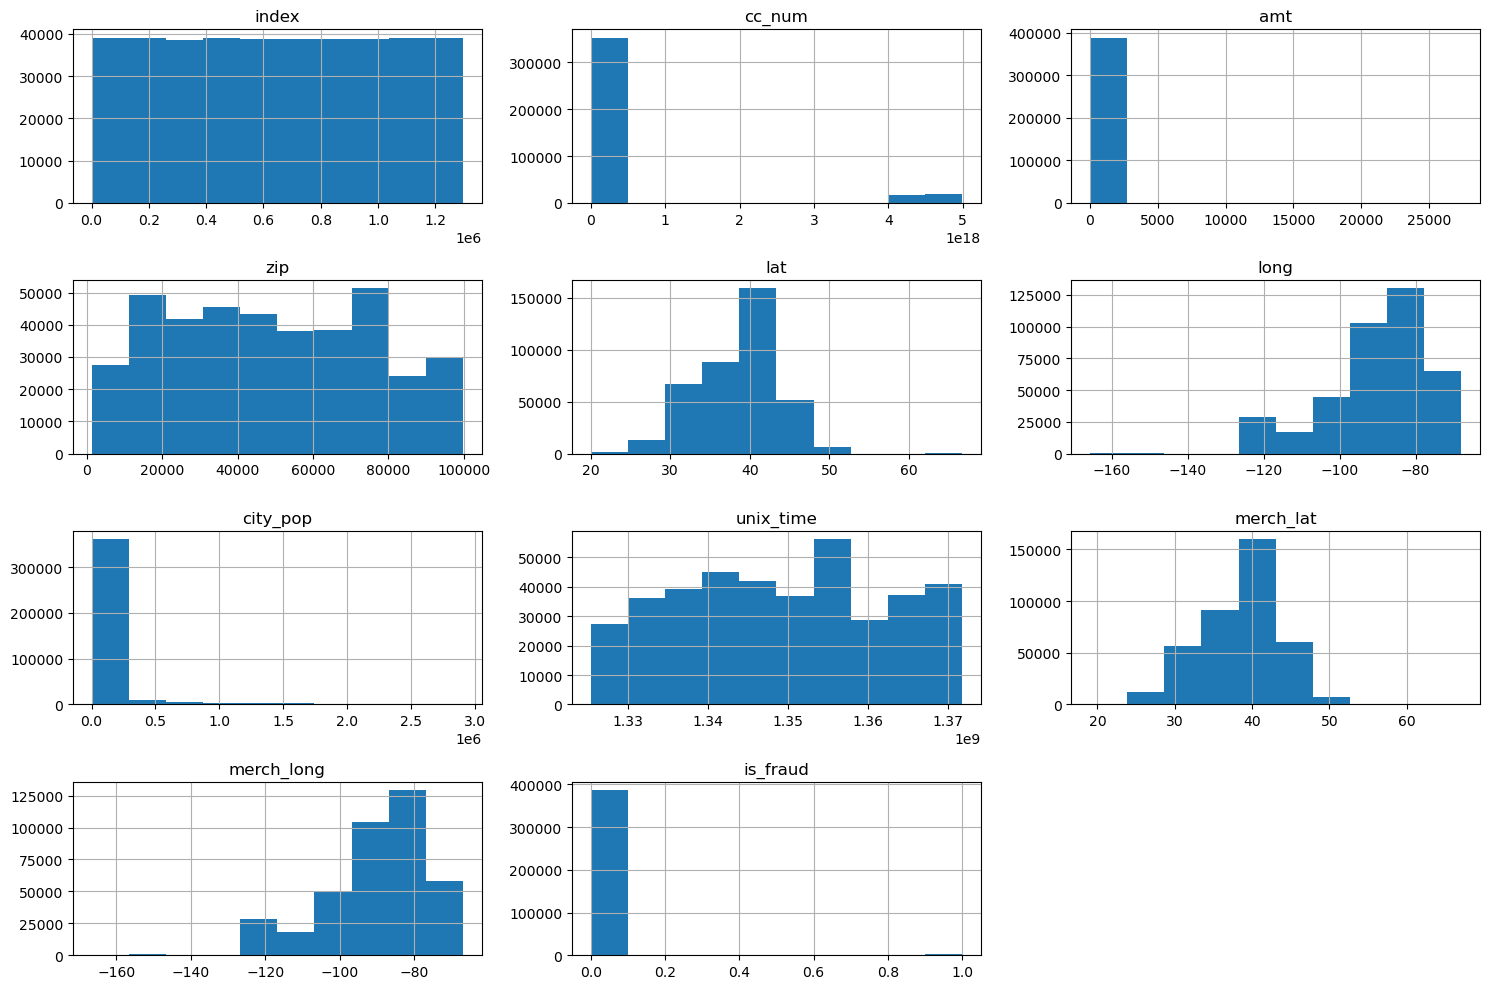

In [25]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()


In [29]:
print(df.isnull().sum())


index                    0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [35]:
df.describe()


,index,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,3.890020e+05,3.890020e+05,389002.000000,389002.000000,389002.000000,389002.000000,3.890020e+05,3.890020e+05,389002.000000,389002.000000,389002.000000
mean,6.485205e+05,4.191512e+17,70.442148,48818.064295,38.533121,-90.237664,8.868084e+04,1.349251e+09,38.531683,-90.236674,0.005789
std,3.745744e+05,1.311579e+18,162.203915,26879.383224,5.074596,13.745855,3.012101e+05,1.285085e+07,5.109400,13.757311,0.075866
min,1.100000e+01,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.669638,0.000000
25%,3.241842e+05,1.800429e+14,9.660000,26237.000000,34.620500,-96.798000,7.430000e+02,1.338751e+09,34.719394,-96.905445,0.000000
50%,6.486485e+05,3.521417e+15,47.570000,48174.000000,39.354300,-87.476900,2.456000e+03,1.349267e+09,39.361065,-87.446843,0.000000
75%,9.735032e+05,4.642255e+15,83.077500,72011.000000,41.940400,-80.158000,2.032800e+04,1.359460e+09,41.956012,-80.253831,0.000000
max,1.296674e+06,4.992346e+18,27390.120000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371817e+09,67.064277,-66.956540,1.000000


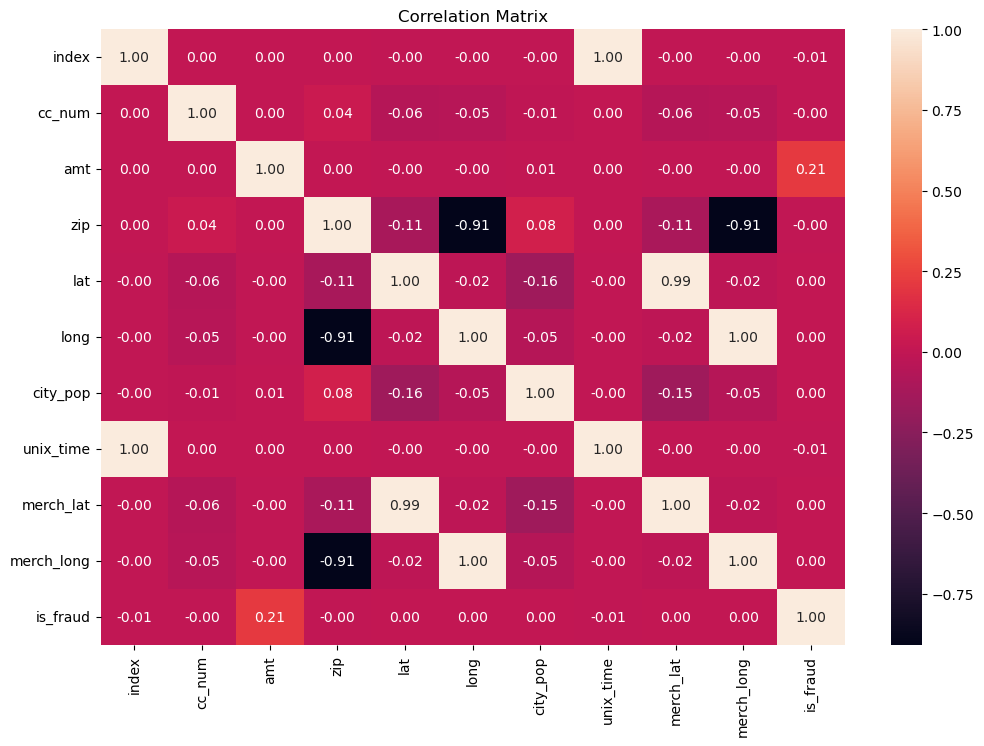

In [39]:
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


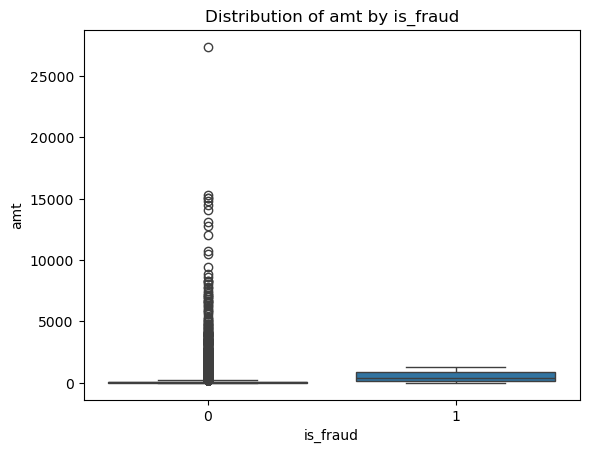

In [41]:
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title("Distribution of amt by is_fraud")
plt.show()


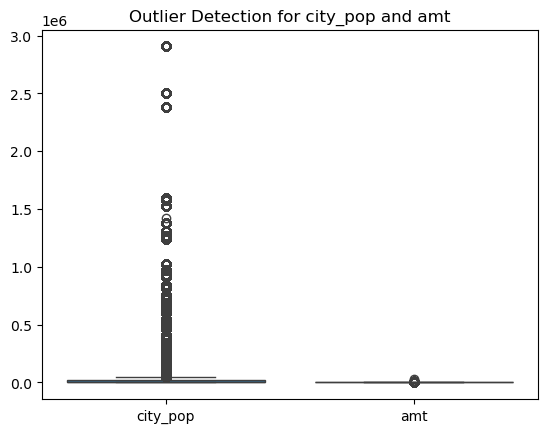

In [45]:
sns.boxplot(data=df[['city_pop', 'amt']])
plt.title("Outlier Detection for city_pop and amt")
plt.show()


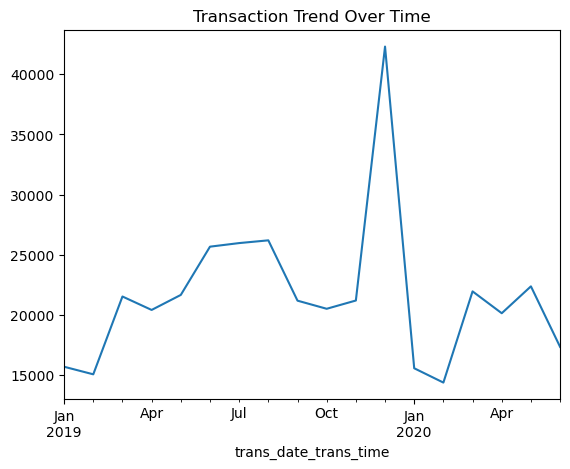

In [69]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df.set_index('trans_date_trans_time').resample('ME').size().plot()
plt.title("Transaction Trend Over Time")
plt.show()


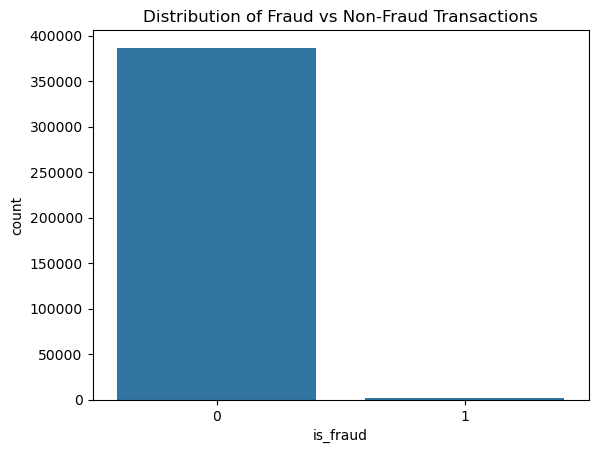

In [55]:
sns.countplot(x='is_fraud', data=df)
plt.title("Distribution of Fraud vs Non-Fraud Transactions")
plt.show()


In [57]:
print(df['zip'].value_counts())
print(df['state'].value_counts())


zip
34112    1066
48088    1065
73754    1062
82514    1050
44233     980
         ... 
29129       1
70065       1
19947       1
46060       1
11763       1
Name: count, Length: 966, dtype: int64
state
TX    28482
NY    25034
PA    23911
CA    17007
OH    13933
MI    13824
FL    12896
IL    12863
AL    12321
MO    11526
MN     9665
AR     9338
NC     9115
WI     8923
VA     8891
SC     8763
KY     8601
IN     8200
IA     8101
OK     7924
GA     7912
MD     7853
WV     7583
NJ     7359
NE     7238
KS     6858
MS     6386
LA     6293
WY     5767
WA     5718
OR     5590
TN     5211
NM     4915
ME     4795
ND     4407
CO     4110
SD     3791
MA     3718
MT     3533
VT     3508
AZ     3243
UT     3137
NH     2404
CT     2380
ID     1710
NV     1678
DC     1061
HI      757
AK      597
RI      171
DE        1
Name: count, dtype: int64


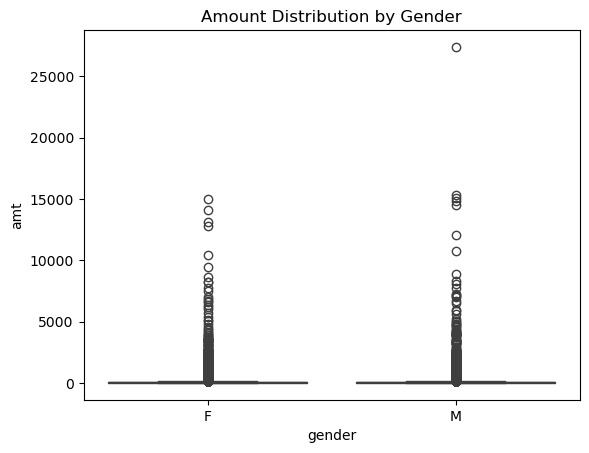

In [61]:
sns.boxplot(x='gender', y='amt', data=df)
plt.title("Amount Distribution by Gender")
plt.show()


In [67]:
corr_with_target = df.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)
print(corr_with_target)


is_fraud      1.000000
amt           0.210706
lat           0.002643
merch_lat     0.002406
long          0.001376
merch_long    0.001351
city_pop      0.001176
zip          -0.001220
cc_num       -0.001280
index        -0.006121
unix_time    -0.006562
Name: is_fraud, dtype: float64


In [71]:
# Conclusion – EDA for Fraud Detection in the Financial Sector
# In conclusion, the Exploratory Data Analysis (EDA) conducted using Python
# provided valuable insights into the nature of credit card transactions and potential fraudulent behavior.
# Through detailed examination of both categorical and numerical features,
# we identified key variables such as transaction amount (amt), city population (city_pop),
# and transaction time that show distinct patterns in relation to fraudulent activity.

# The analysis revealed data imbalances, outliers,
# and correlations that are crucial for designing effective fraud detection models.
# Visualizations helped in understanding how fraudulent transactions differ from legitimate ones in terms of frequency,
# timing, and monetary value.
# Time-based trends and categorical breakdowns further contributed to identifying potential risk patterns.

# These findings establish a strong foundation for the next steps in the fraud detection
# pipeline—such as feature engineering, model selection, and validation.
# The insights gained from EDA will guide the development of machine learning models with improved accuracy, precision,
# and recall in detecting fraudulent activities, 
# ultimately enhancing financial security and reducing risk for institutions.